# Bitcoin: Linear Regression Model

## In this project we determine whether the volume traded for a given day affects the highest price bitcoin reaches that day as a percentage of the days average value

In [2]:
# import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# importing data and exploring it
data = pd.read_csv('bit_data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There are null values and the date is in the wrong format
### Start cleaning the data:

In [4]:
# converting Timestamp to datetime64
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')

# sets the index as the date
data.index = data.Timestamp

# Resamples the data to the average daily value of each column
data = data.resample('D').mean()

# drops any missing values that are present
data = data.dropna()

# check the data
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


### This is looking much better 

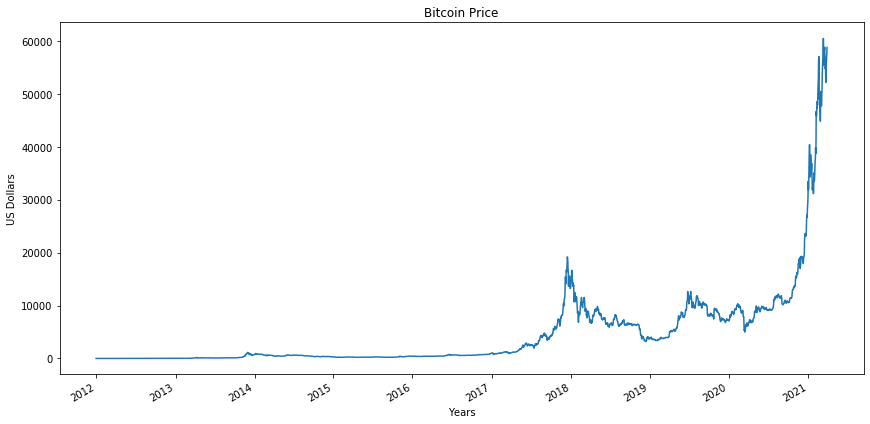

In [5]:
# plotting the price throughout the years
data.Weighted_Price.plot(title = "Bitcoin Price", figsize=(12,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.savefig('price.png')
plt.show()

### The price only started to change in the last 4 years or so. Therefore, the past 4 years will give us a better indication for our model 

In [6]:
data2 = pd.read_csv('bit_data.csv')
data2.Timestamp = pd.to_datetime(data2.Timestamp, unit='s')
data2.index = data2.Timestamp
data2 = data2.resample('D').mean()
data2 = data2.dropna()

# changes data to strictly to the previous 4 years, which is March 2017 to March 2021
data2 = data2.iloc[(-365*4):]

data2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-04-02,1080.593497,1081.383022,1080.004092,1080.672148,6.485481,7024.353415,1080.593671
2017-04-03,1126.691702,1127.431731,1126.089058,1126.861278,8.091207,9121.722155,1126.757475
2017-04-04,1142.233199,1142.744291,1141.736422,1142.265800,5.626131,6422.928509,1142.210007
2017-04-05,1129.659677,1130.063433,1129.289540,1129.731131,4.514521,5088.547211,1129.667539
2017-04-06,1167.515581,1168.047790,1167.114932,1167.629600,6.888609,8062.271067,1167.577052


### Now we need to calculate the high price as function of the average daily price as percentage 

In [7]:
# calculating the percentage change
data2['Percentage_Gain'] = (data2['High'] / data2['Weighted_Price'] * 100) - 100

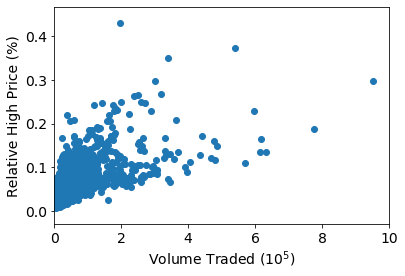

In [8]:
# plotting the scatter
x = data2[['Volume_(Currency)']] / 100000
y = data2['Percentage_Gain']


plt.tight_layout()
plt.scatter(x,y)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(0,10)
plt.xlabel('Volume Traded ($10^{5}$)', fontsize=14)
plt.ylabel('Relative High Price (%)',fontsize=14)
plt.savefig('scatter.png')
plt.show()

### There is clearly some correlation with the volume traded and the perentage of the high price as a function of the average price 

## Model: Linear Regression

In [19]:
# split into test train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

# train the model
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Print out the line
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  0.04418969780093676
Coefficient:  [0.03185965]


In [21]:
# use the test data to predict values to test the model
y_pred = model.predict(x_test)

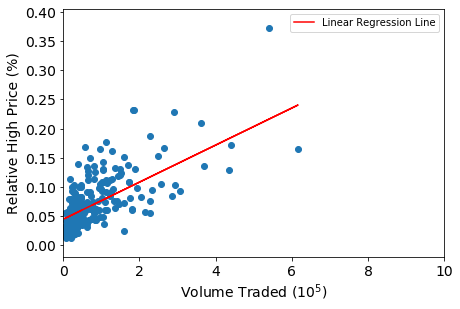

In [22]:
# plot the regression line

plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, 'Red', label = 'Linear Regression Line')
plt.tight_layout()
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(0,10)
plt.xlabel('Volume Traded ($10^{5}$)', fontsize=14)
plt.ylabel('Relative High Price (%)',fontsize=14)
plt.savefig('LinReg.png')
plt.legend()
plt.show()

In [23]:
# calculating the errors and accuracy 
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 46.81
Mean Absolute Error: 0.023921154537097325
Mean Square Error: 0.0010565097832587766
Root Mean Square Error: 0.03250399641980624


### From the R squared value, we see that the correlation is not particularly strong 